Perform Hierarchical Drift-Diffusion Modeling of the StateSwitch Dynamic Responses using the HDDM toolbox

Note that for some reason, the saving of models only works when running the script in Python 2.
The following commands can be used to switch between the two python installations in the terminal.

source activate py27
source activate py36

It should also be possible to switch between kernels in Jupyter Notebook.

In [1]:
# Script was originally run using Python 3
# Run the following command in Terminal to install HDDM package
# conda install -c pymc hddm

import hddm
print("HDDM version: "+ hddm.__version__)

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
print("Numpy version: "+ np.__version__) # version <=1.11 necessary for pymc2 (https://groups.google.com/forum/#!topic/hddm-users/Jdwm_IoJk5U)

import scipy.io as io

import warnings
warnings.filterwarnings('ignore')
print("Important: Warnings disabled for improved clarity")

import pickle

def savePatch(self, fname):
    with open(fname, 'wb') as f:
        pickle.dump(self, f)


HDDM version: 0.6.0
Numpy version: 1.14.0
Important: Warnings disabled for improved clarity


/Users/kosciessa/anaconda3/envs/py35/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


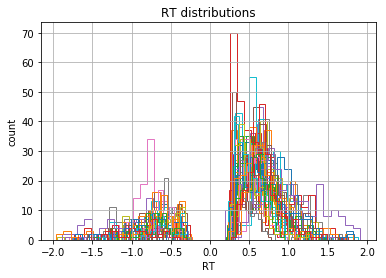

In [2]:
# get data from numpy structured array

group = 'YA'

dataPath = '/Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/';
csvData = dataPath+'StateSwitchDynamicTrialData_MRI_'+group+'.dat';

savePath = '/Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRI3/'

########################
## Load and flip data ##
########################

data = hddm.load_csv(csvData)
data.rename(columns={'acc':'response'}, inplace=True)
data.rename(columns={'subject':'subj_idx'}, inplace=True)

dataFlipped = hddm.utils.flip_errors(data)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in dataFlipped.groupby('subj_idx'):
    subj_data.rt.hist(bins=40, histtype='step', ax=ax)
    

# Modeling by load

Run model with varying drift rate and threshold only

In [3]:
m_stim_v_a_t = hddm.HDDM(data, depends_on={'v': ['dim'], 'a': ['dim'], 't': ['dim']}, p_outlier=.05)
m_stim_v_a_t.find_starting_values()
m_stim_v_a_t.sample(7000, burn=5000, dbname='traces.db', db='pickle')
print('Model m_stim_v_a_t_byAge will be saved at: '+ savePath+'Model_m_stim_v_a_t')
#m_stim_v_a_t.save(savePath+'Model_m_stim_v_a_t_byAge')
m_stim_v_a_t.savePatch = savePatch(m_stim_v_a_t, savePath+'Model_m_stim_v_a_t')

 [-----------------100%-----------------] 7000 of 7000 complete in 864.1 secModel m_stim_v_a_t_byAge will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRI3/Model_m_stim_v_a_t


In [4]:
# save individual results as CSV
dataMat = m_stim_v_a_t.get_traces()
fileName = 'Data_v_a_t.csv'
print('Data will be saved at: '+ savePath+fileName)
dataMat.to_csv(savePath+fileName, sep='\t')

Data will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRI3/Data_v_a_t.csv


In [5]:
# Load an existing model
#m = pickle.load(open(savePath+'Model_m_stim_v_a_t', 'rb'))

Text(0.5,1,'YA: Posterior of drift-rate group means')

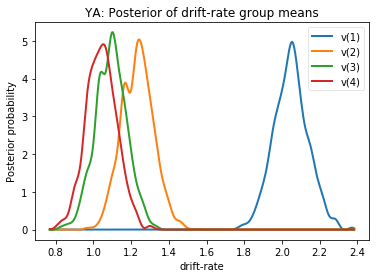

In [6]:
# drift rate v: young adults
v_11,v_12,v_13,v_14 = m_stim_v_a_t.nodes_db.node[['v(1)', 'v(2)', 'v(3)','v(4)']]
hddm.analyze.plot_posterior_nodes([v_11,v_12,v_13,v_14])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('YA: Posterior of drift-rate group means')

Text(0.5,1,'YA: Posterior of threshold group means')

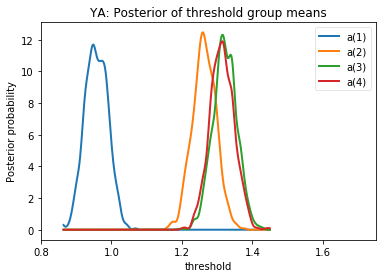

In [7]:
# threshold a: younger adults 
a_11,a_12,a_13,a_14 = m_stim_v_a_t.nodes_db.node[['a(1)', 'a(2)', 'a(3)','a(4)']]
hddm.analyze.plot_posterior_nodes([a_11,a_12,a_13,a_14])
plt.xlim(.8, 1.75)
plt.xlabel('threshold')
plt.ylabel('Posterior probability')
plt.title('YA: Posterior of threshold group means')

Teichert et al., 2016: 'integration onset may be amenable to top-down regulation'
Non-decision times typically range from 200 to 400 ms in different studies.


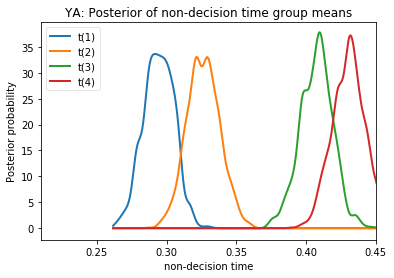

In [8]:
# non-decision time t younger adults 
t_11,t_12,t_13,t_14 = m_stim_v_a_t.nodes_db.node[['t(1)', 't(2)', 't(3)','t(4)']]
hddm.analyze.plot_posterior_nodes([t_11,t_12,t_13,t_14])
plt.xlim(0.21, 0.45)
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.title('YA: Posterior of non-decision time group means')

print("Teichert et al., 2016: 'integration onset may be amenable to top-down regulation'")
print("Non-decision times typically range from 200 to 400 ms in different studies.")

Plotting a(1)
Plotting a(2)
Plotting a(3)
Plotting a(4)
Plotting a_std
Plotting v(1)
Plotting v(2)
Plotting v(3)
Plotting v(4)
Plotting v_std
Plotting t(1)
Plotting t(2)
Plotting t(3)
Plotting t(4)
Plotting t_std


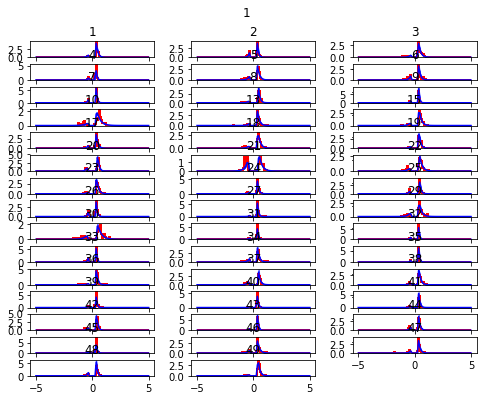

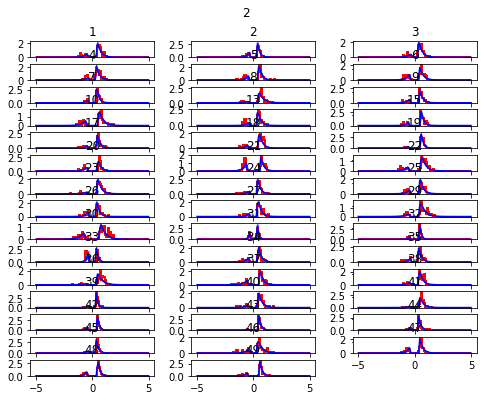

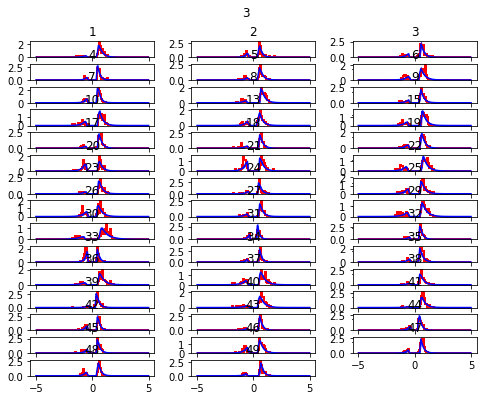

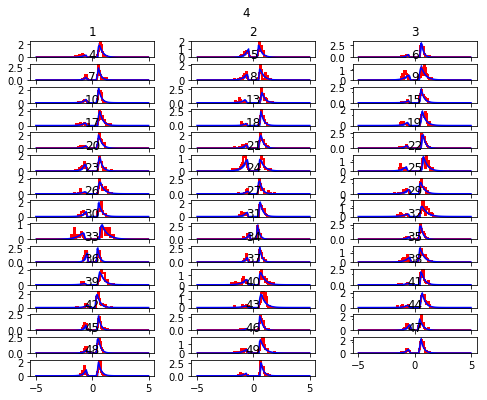

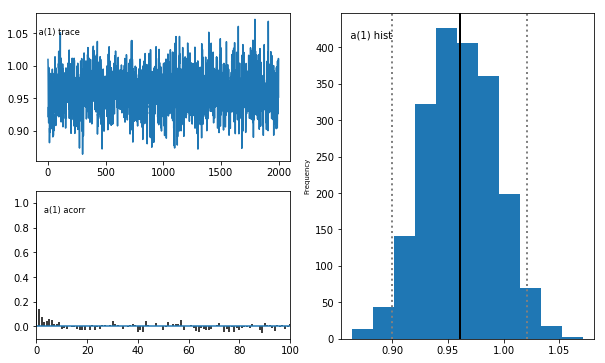

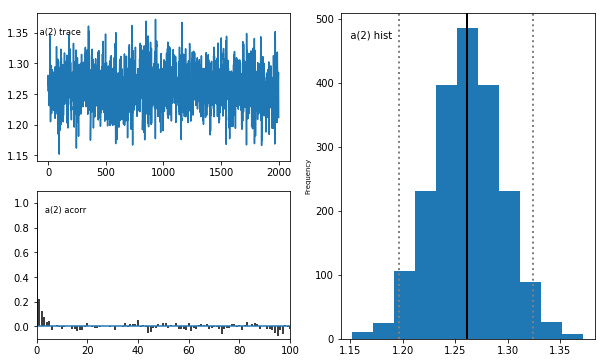

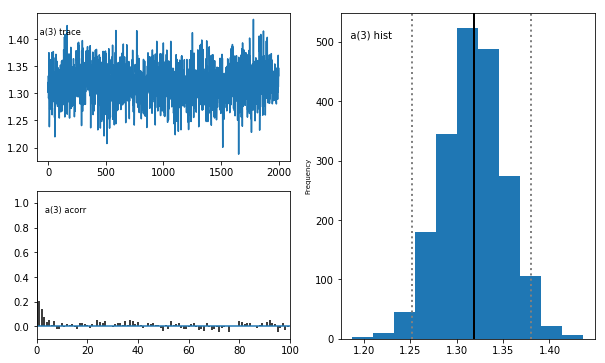

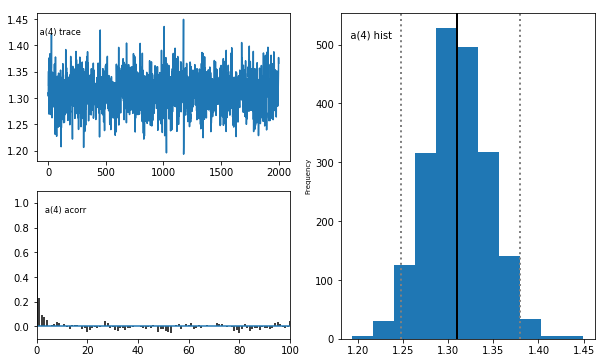

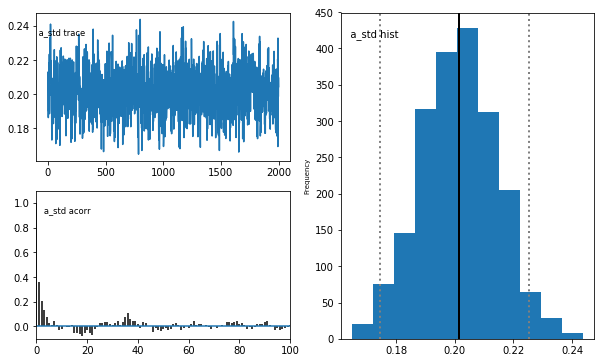

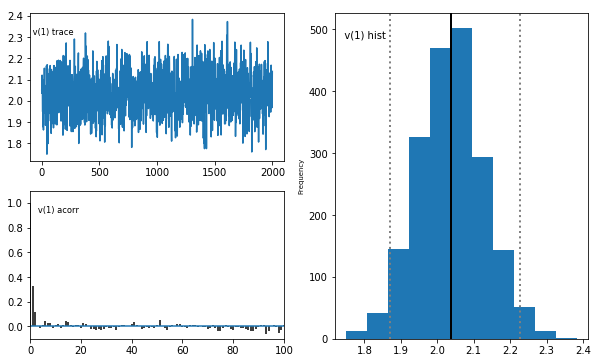

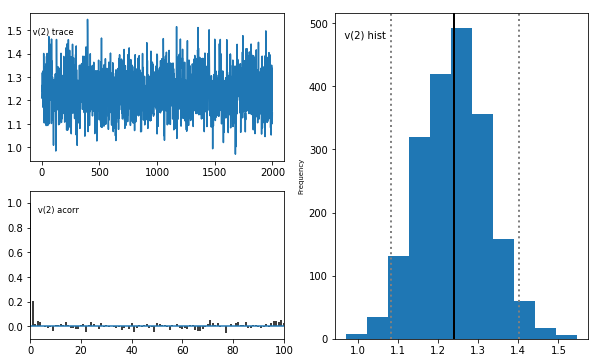

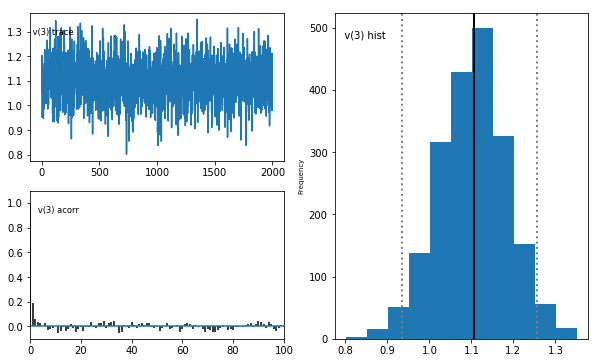

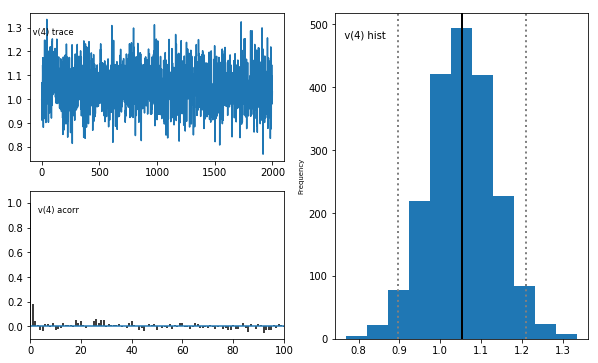

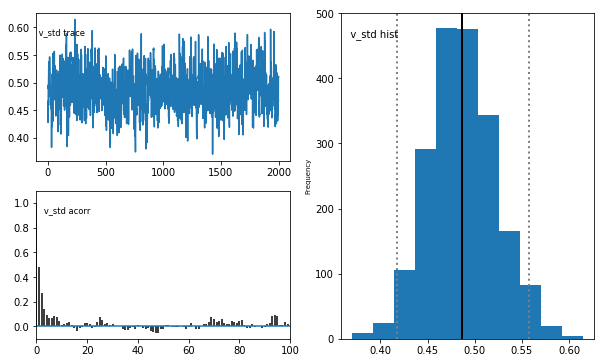

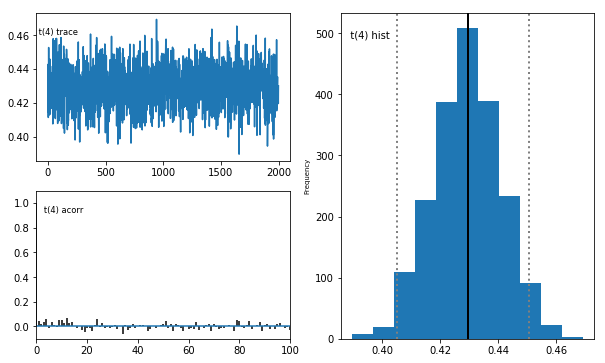

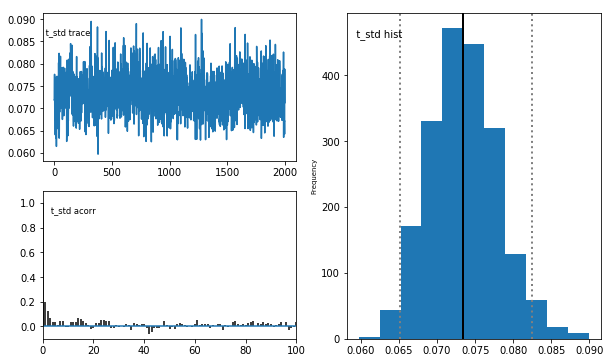

In [9]:
# posterior predictive check
m_stim_v_a_t.plot_posterior_predictive()
m_stim_v_a_t.plot_posteriors()

In [10]:
print("Drift rate decreases")
print("P(1 > 2)=",(v_11.trace() > v_12.trace()).mean())
print("P(2 > 3)=",(v_12.trace() > v_13.trace()).mean())
print("P(3 > 4)=",(v_13.trace() > v_14.trace()).mean())
print("")

print("Non-decision time increases")
print("P(1 < 2)=",(t_11.trace() < t_12.trace()).mean())
print("P(2 < 3)=",(t_12.trace() < t_13.trace()).mean())
print("P(3 < 4)=",(t_13.trace() < t_14.trace()).mean())
print("")

print("Threshold increases")
print("P(1 < 2)=",(a_11.trace() < a_12.trace()).mean())
print("P(2 < 3)=",(a_12.trace() < a_13.trace()).mean())
print("P(3 < 4)=",(a_13.trace() < a_14.trace()).mean())

Drift rate decreases
P(1 > 2)= 1.0
P(2 > 3)= 0.8785
P(3 > 4)= 0.675

Non-decision time increases
P(1 < 2)= 0.9745
P(2 < 3)= 1.0
P(3 < 4)= 0.9205

Threshold increases
P(1 < 2)= 1.0
P(2 < 3)= 0.8835
P(3 < 4)= 0.4265


In [11]:
#m_stim_v_a_t_byAge.print_stats()

Run additional models with fewer parameters, as indicated by EEG

In [12]:
m_stim_v_t = hddm.HDDM(data, depends_on={'v': ['dim'], 't': ['dim']}, p_outlier=.05)
m_stim_v_t.find_starting_values()
m_stim_v_t.sample(7000, burn=5000, dbname='traces.db', db='pickle')
print('Model m_stim_v_t will be saved at: '+ savePath+'m_stim_v_t')
m_stim_v_t.savePatch = savePatch(m_stim_v_a_t, savePath+'m_stim_v_t')
# save individual results as CSV
dataMat = m_stim_v_t.get_traces()
fileName = 'Data_v_t.csv'
print('Data will be saved at: '+ savePath+fileName)
dataMat.to_csv(savePath+fileName, sep='\t')

 [-----------------100%-----------------] 7000 of 7000 complete in 742.4 secModel m_stim_v_t will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRI3/m_stim_v_t
Data will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRI3/Data_v_t.csv


Plotting a
Plotting a_std
Plotting v(1)
Plotting v(2)
Plotting v(3)
Plotting v(4)
Plotting v_std
Plotting t(1)
Plotting t(2)
Plotting t(3)
Plotting t(4)
Plotting t_std


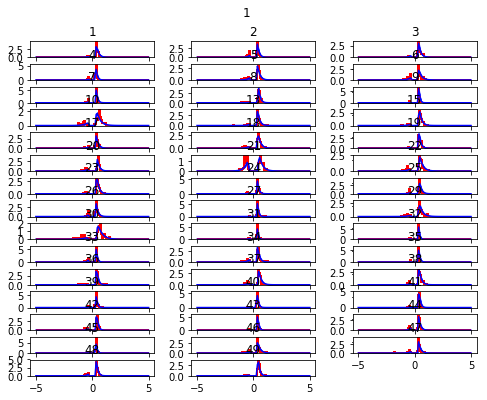

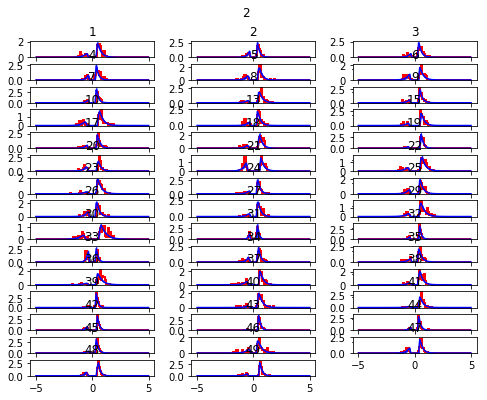

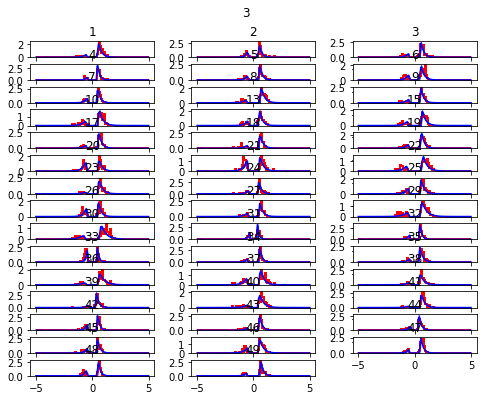

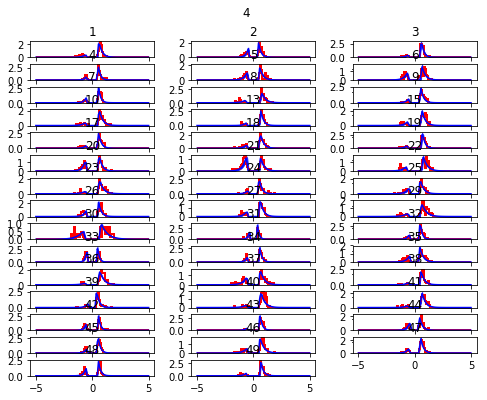

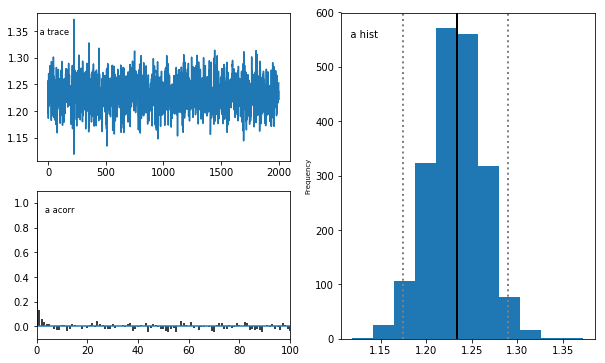

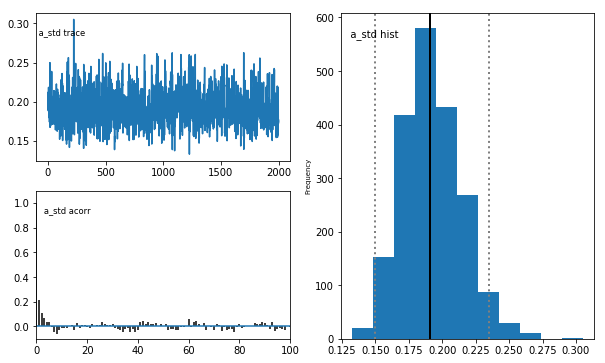

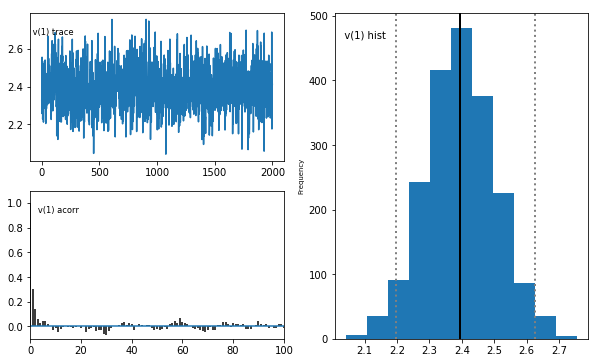

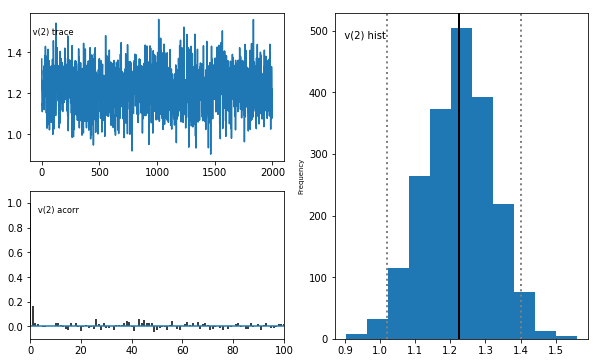

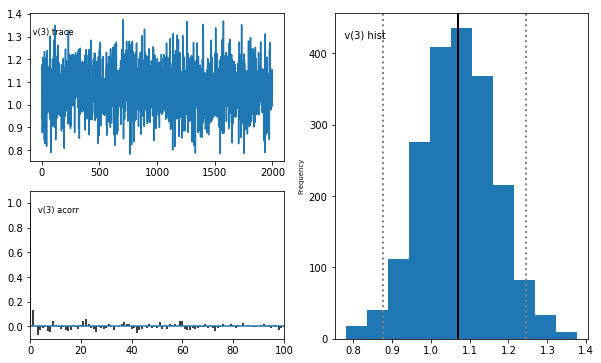

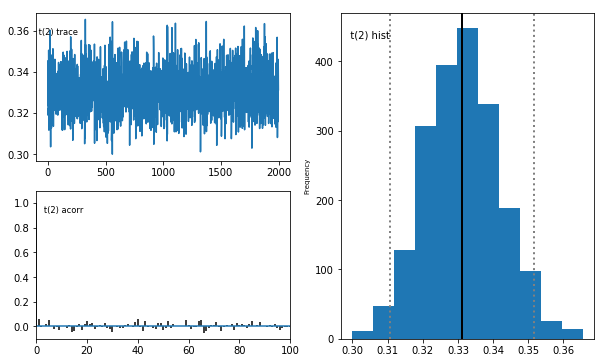

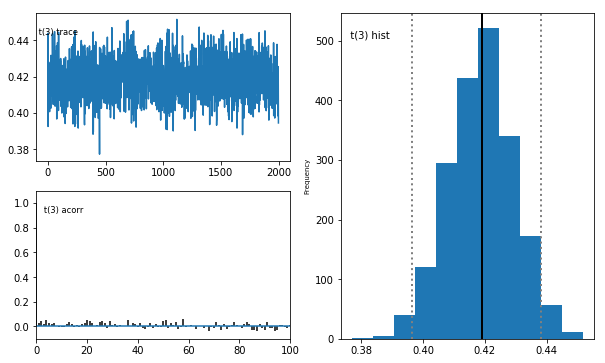

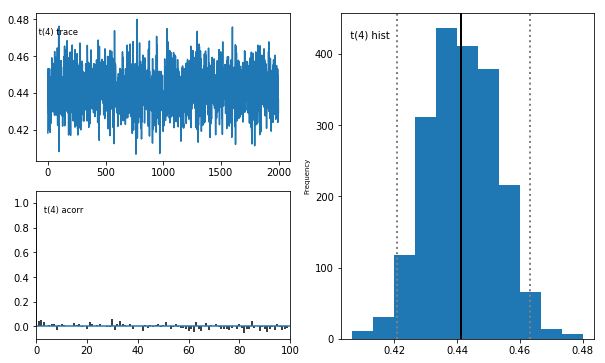

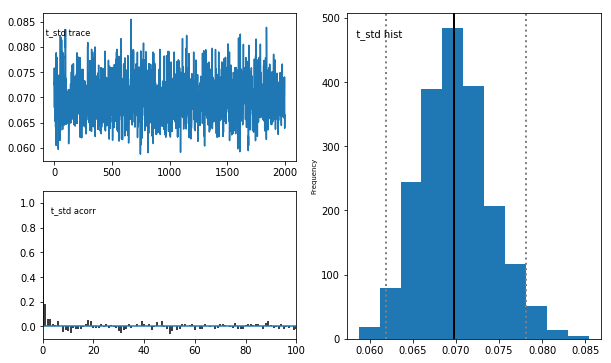

In [13]:
# posterior predictive check
m_stim_v_t.plot_posterior_predictive()
m_stim_v_t.plot_posteriors()

In [14]:
m_stim_v_a = hddm.HDDM(data, depends_on={'v': ['dim'], 'a': ['dim']}, p_outlier=.05)
m_stim_v_a.find_starting_values()
m_stim_v_a.sample(7000, burn=5000, dbname='traces.db', db='pickle')
print('Model m_stim_v_a will be saved at: '+ savePath+'m_stim_v_a')
m_stim_v_a.savePatch = savePatch(m_stim_v_a, savePath+'m_stim_v_a')
# save individual results as CSV
dataMat = m_stim_v_a.get_traces()
fileName = 'Data_v_a.csv'
print('Data will be saved at: '+ savePath+fileName)
dataMat.to_csv(savePath+fileName, sep='\t')

 [-----------------100%-----------------] 7000 of 7000 complete in 649.2 secModel m_stim_v_a will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRI3/m_stim_v_a
Data will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRI3/Data_v_a.csv


Plotting a(1)
Plotting a(2)
Plotting a(3)
Plotting a(4)
Plotting a_std
Plotting v(1)
Plotting v(2)
Plotting v(3)
Plotting v(4)
Plotting v_std
Plotting t
Plotting t_std


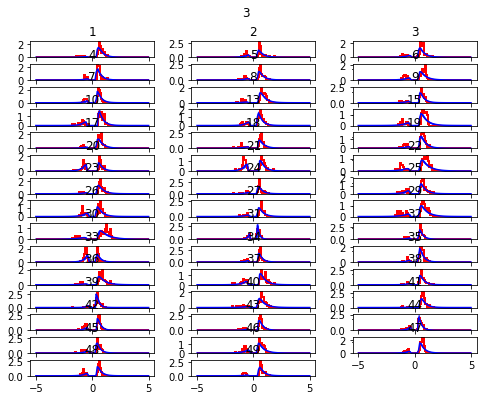

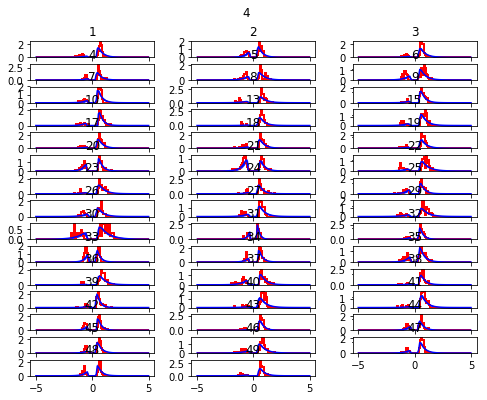

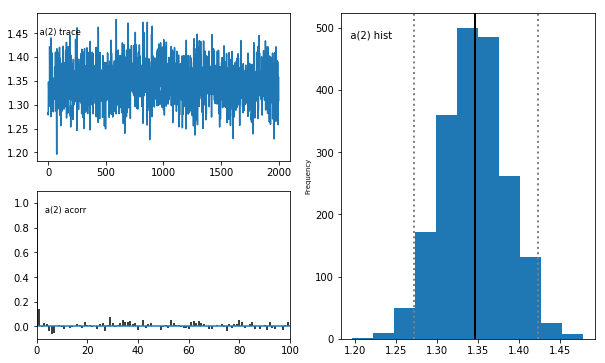

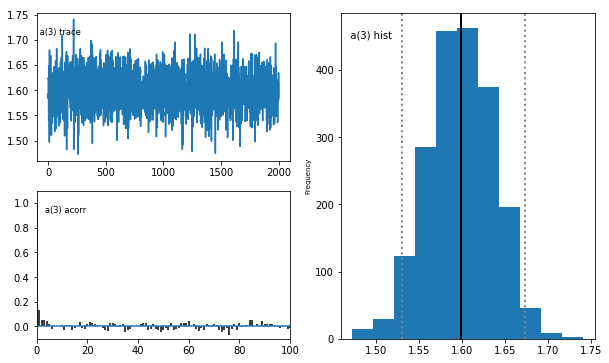

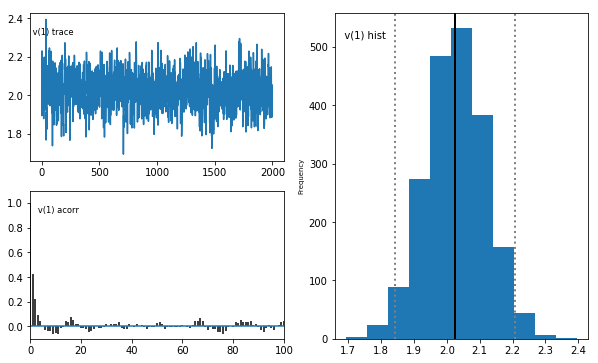

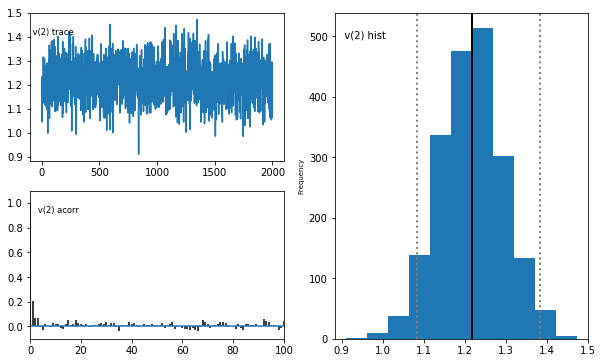

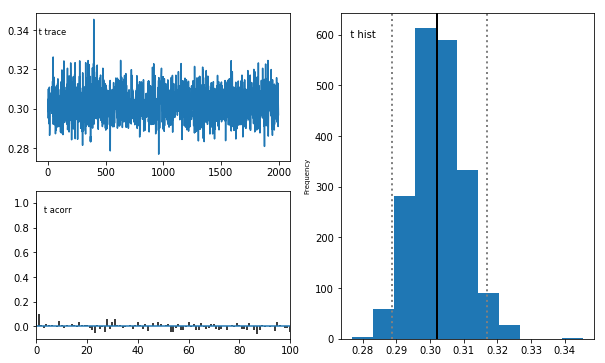

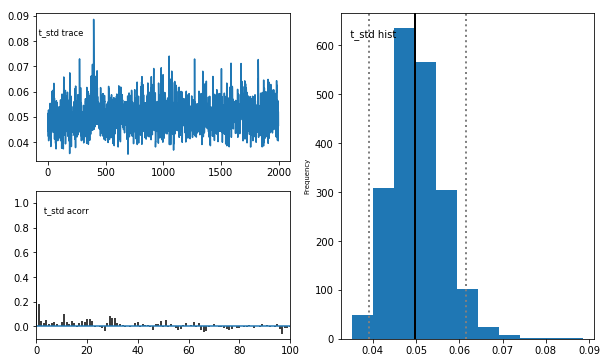

In [15]:
# posterior predictive check
m_stim_v_a.plot_posterior_predictive()
m_stim_v_a.plot_posteriors()

In [16]:
m_stim_v = hddm.HDDM(data, depends_on={'v': ['dim']}, p_outlier=.05)
m_stim_v.find_starting_values()
m_stim_v.sample(7000, burn=5000, dbname='traces.db', db='pickle')
print('Model m_stim_v will be saved at: '+ savePath+'m_stim_v')
m_stim_v.savePatch = savePatch(m_stim_v, savePath+'m_stim_v')
# save individual results as CSV
dataMat = m_stim_v.get_traces()
fileName = 'Data_v.csv'
print('Data will be saved at: '+ savePath+fileName)
dataMat.to_csv(savePath+fileName, sep='\t')

 [-----------------100%-----------------] 7000 of 7000 complete in 545.4 secModel m_stim_v will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRI3/m_stim_v
Data will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRI3/Data_v.csv


Plotting a
Plotting a_std
Plotting v(1)
Plotting v(2)
Plotting v(3)
Plotting v(4)
Plotting v_std
Plotting t
Plotting t_std


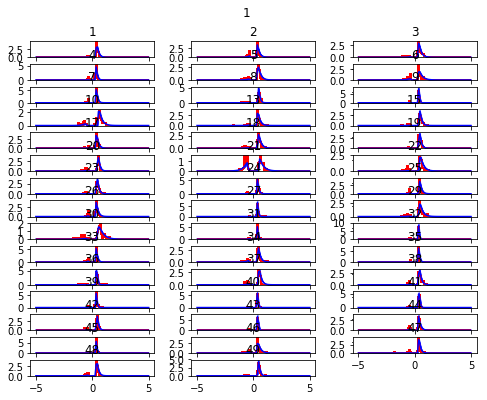

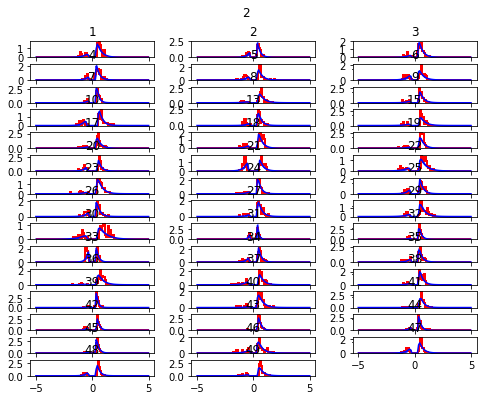

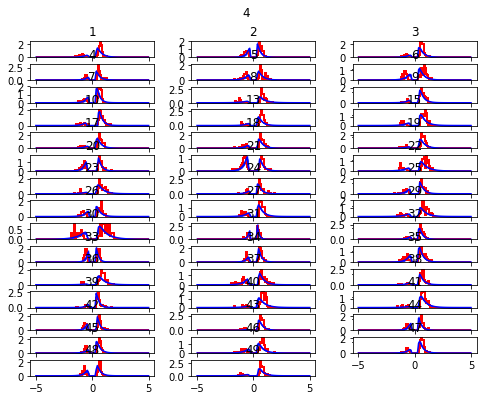

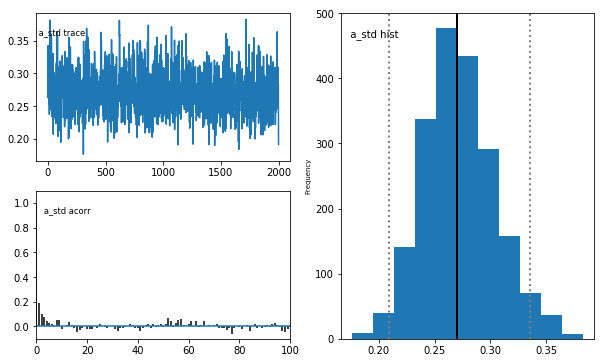

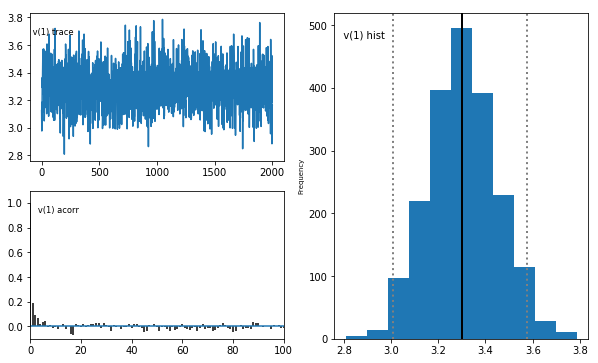

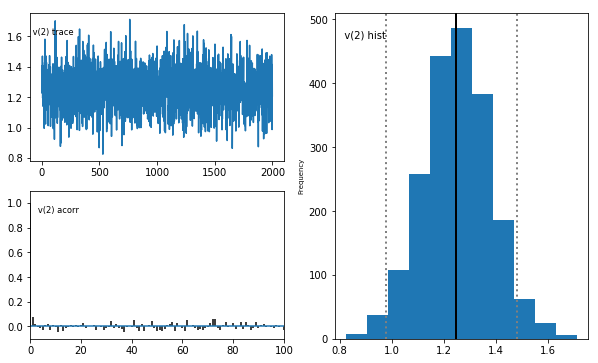

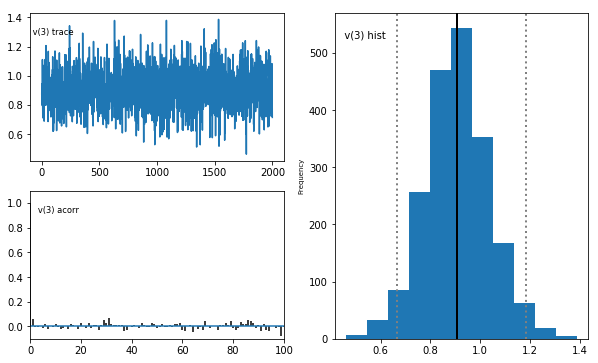

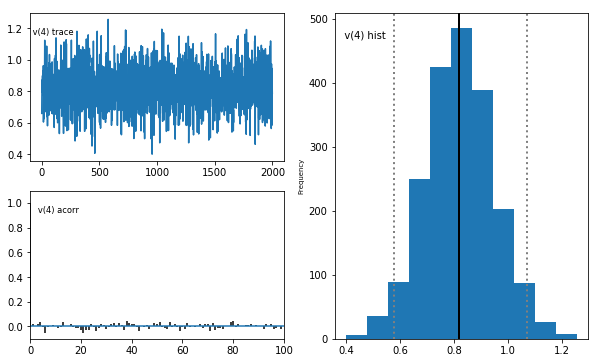

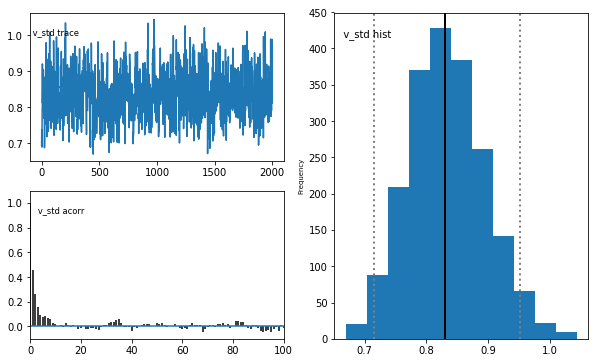

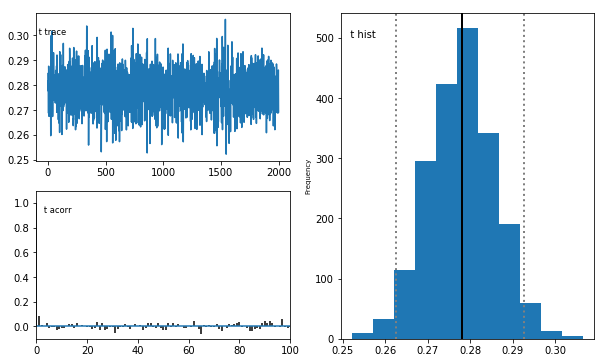

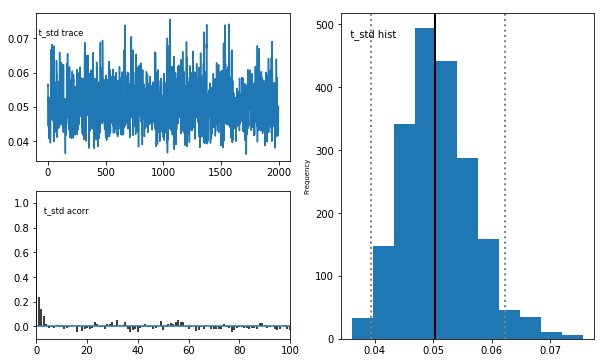

In [17]:
# posterior predictive check
m_stim_v.plot_posterior_predictive()
m_stim_v.plot_posteriors()

In [18]:
m_stim = hddm.HDDM(data, p_outlier=.05)
m_stim.find_starting_values()
m_stim.sample(7000, burn=5000, dbname='traces.db', db='pickle')
print('Model m_stim will be saved at: '+ savePath+'m_stim')
m_stim.savePatch = savePatch(m_stim, savePath+'m_stim')
# save individual results as CSV
dataMat = m_stim.get_traces()
fileName = 'Data_null.csv'
print('Data will be saved at: '+ savePath+fileName)
dataMat.to_csv(savePath+fileName, sep='\t')

 [-----------------100%-----------------] 7000 of 7000 complete in 329.9 secModel m_stim will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRI3/m_stim
Data will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRI3/Data_null.csv


Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std


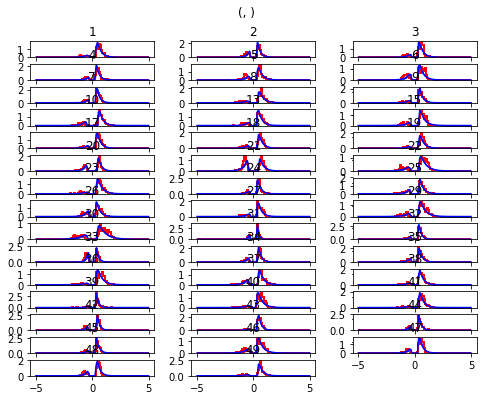

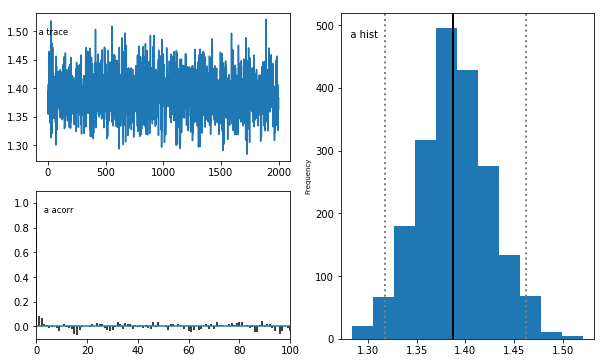

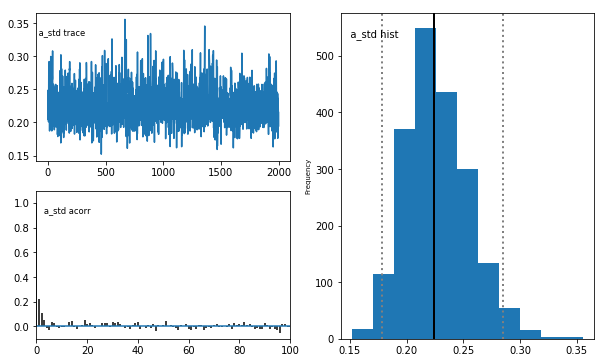

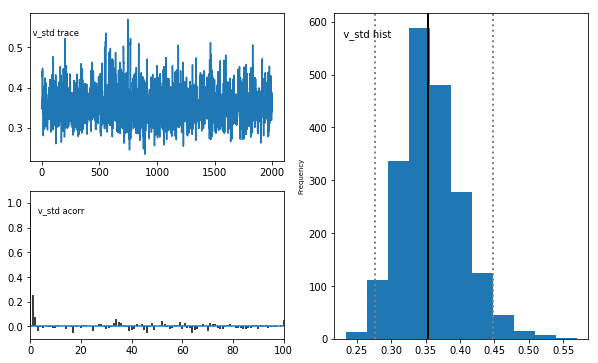

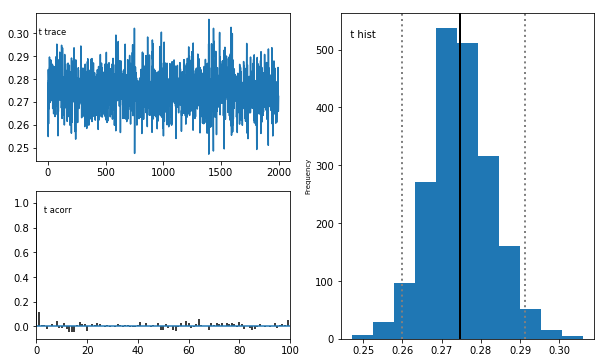

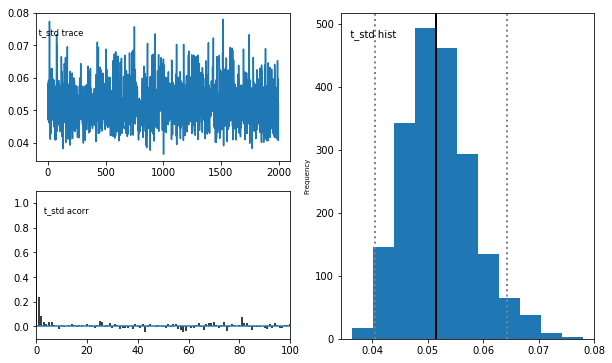

In [19]:
# posterior predictive check
m_stim.plot_posterior_predictive()
m_stim.plot_posteriors()

Compare DICs

In [20]:
print("Model no variation DIC: %f" % m_stim.dic)
print("Model varying v DIC: %f" % m_stim_v.dic)
print("Model varying a v DIC: %f" % m_stim_v_a.dic)
print("Model varying t v DIC: %f" % m_stim_v_t.dic)
print("Model varying a t v DIC: %f" % m_stim_v_a_t.dic)

Model no variation DIC: 9514.208951
Model varying v DIC: 7669.727963
Model varying a v DIC: 5544.981099
Model varying t v DIC: 3836.909170
Model varying a t v DIC: 3361.248022


In [21]:
 m_stim_v.dic_info

{'DIC': 7669.7279627788075,
 'deviance': 7432.195070566069,
 'pD': 237.53289221273826}

In [22]:
 m_stim_v.dic_info['deviance'] + 2* m_stim_v.dic_info['pD']

7907.260854991546

In [23]:
m_stim_v_a.dic_info['deviance'] + 2* m_stim_v_a.dic_info['pD']

5860.634414362687

In [24]:
m_stim_v_t.dic_info['deviance'] + 2* m_stim_v_t.dic_info['pD']

4173.331497883517

In [25]:
m_stim_v_a_t.dic_info['deviance'] + 2* m_stim_v_a_t.dic_info['pD']

3763.662248344087

In [26]:
#print("Model varying v DIC: %f" % m_stim_v.dic_info['deviance'] +  m_stim_v.dic_info['pD'] +  m_stim_v.dic_info['pD'])
#print("Model varying a v DIC: %f" % m_stim_v_a.dic_info['deviance'] +  m_stim_v_a.dic_info['pD'] +  m_stim_v_a.dic_info['pD'])
#print("Model varying t v DIC: %f" %  m_stim_v_t.dic_info['deviance'] +  m_stim_v_t.dic_info['pD'] +  m_stim_v_t.dic_info['pD'])
#print("Model varying a t v DIC: %f" %  m_stim_v_a_t.dic_info['deviance'] +  m_stim_v_a_t.dic_info['pD'] +  m_stim_v_a_t.dic_info['pD'])